In [376]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.metrics 

IMPORTING THE DATASET 

In [377]:
df = pd.read_csv("Train.csv")
df.drop(['Unnamed: 0'],axis = 1, inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...
3745,BMW X5 3.0d,Chennai,2009,150000,Diesel,Automatic,First,11.0 kmpl,2993 CC,235 bhp,5.0,18.75
3746,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,Delhi,2012,85000,Diesel,Automatic,First,11.79 kmpl,2179 CC,120 bhp,7.0,6.25
3747,Maruti Wagon R LXI BSII,Ahmedabad,2007,55100,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,1.45
3748,Renault Duster 85PS Diesel RxL,Hyderabad,2014,77500,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.0,6.60


VISUALSING 

In [378]:
# sns.pairplot(df)

ENCODING THE DATA 

In [379]:
for i in ['Location','Fuel_Type','Owner_Type','Year','Transmission','Seats', "Name"]:
    df[i] = df[i].astype('category').cat.codes
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1327,5,19,16500,2,1,0,23.84 kmpl,1199 CC,84 bhp,2,5.00
1,741,7,19,47357,0,0,0,18.49 kmpl,1493 CC,100 bhp,4,8.37
2,1242,9,16,35000,2,1,0,15.0 kmpl,1598 CC,103.52 bhp,2,4.50
3,1266,6,9,200000,0,1,2,17.2 kmpl,1396 CC,53.5 bhp,2,0.85
4,1300,9,15,64000,0,1,2,21.02 kmpl,1248 CC,88.76 bhp,2,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...
3745,119,2,11,150000,0,0,0,11.0 kmpl,2993 CC,235 bhp,2,18.75
3746,714,4,14,85000,0,0,0,11.79 kmpl,2179 CC,120 bhp,4,6.25
3747,980,0,9,55100,2,1,0,18.9 kmpl,998 CC,67.1 bhp,2,1.45
3748,1167,5,16,77500,0,1,0,20.45 kmpl,1461 CC,83.8 bhp,2,6.60


REMOVING THE UNITS FROM MILEAGE ENGINE AND POWER

In [380]:
df['Mileage'] = df['Mileage'].str.replace(" kmpl","")
df['Engine'] = df['Engine'].str.replace(" CC","")
df['Power'] = df['Power'].str.replace(" bhp","")
for i in ['Mileage','Engine','Power','Seats']:
    df[i] = pd.to_numeric(df[i],errors="coerce")

for i in ['Mileage','Engine','Power']:
    df[i] = df[i].fillna(df[i].mean())


REMOVING THE OUTLIERS

In [381]:
from scipy import stats
numerical_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Name']
df = df[(np.abs(stats.zscore(df[numerical_cols])) < 3).all(axis=1)]

FEATURE SCALING 

In [382]:
def standardise(col):
    mean = df[col].mean() #df.loc[]
    std_value = df[col].std()
    df[col] = (df[col]-mean)/std_value
for i in ['Kilometers_Driven','Mileage','Engine','Power','Price', 'Name']:
    standardise(i)
df

C:\Users\clash\AppData\Local\Temp\ipykernel_8088\2785585910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col]-mean)/std_value


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1.377670,5,19,-1.289196,2,1,0,1.349431,-0.706671,-0.553323,2,-0.415593
1,-0.005621,7,19,-0.295294,0,0,0,0.013021,-0.151800,-0.191915,4,0.017988
2,1.177022,9,16,-0.693312,2,1,0,-0.858768,0.046368,-0.112405,2,-0.479922
4,1.313934,9,15,0.240776,0,1,2,0.645006,-0.614192,-0.445804,2,-0.717942
5,1.068436,10,14,-0.479793,2,1,2,-0.901233,0.046368,-0.078975,2,-0.769405
...,...,...,...,...,...,...,...,...,...,...,...,...
3745,-1.473891,2,11,3.010830,0,0,0,-1.857953,2.679173,2.857466,2,1.353470
3746,-0.069356,4,14,0.917184,0,0,0,-1.660614,1.142898,0.259845,4,-0.254769
3747,0.558554,0,9,-0.045893,2,1,0,0.115437,-1.086021,-0.935061,2,-0.872333
3748,0.999979,5,16,0.675610,0,1,0,0.502622,-0.212194,-0.557841,2,-0.209738


In [383]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


STARTING THE MODEL

In [384]:
x = np.c_[np.ones((x.shape[0], 1)),x]   
n_features = x.shape[1]
theta = np.zeros((n_features,1))

In [ ]:
learning_rate = 0.0001
iterations = 1000000
best_mse = float('inf')
best_itr = 0
mse_array = []
m = x.shape[0]

for i in range(iterations):
    prediction = x.dot(theta)
    error = prediction - y.reshape(-1,1)
    mse = np.mean(error**2).tolist()
    theta = theta - (learning_rate/m) * x.T.dot(error)
    

    mse_array.append(mse)


    if mse < best_mse:
        best_mse = mse
        best_itr = i
    
    
    if i % 100 == 0:  # Print every 100 iterations
        print(f'Iteration {i}, MSE: {mse:.6f}, error: {error}')

print(f"\nBest MSE: {best_mse:.6f} at iteration {best_itr}")
r2 = sklearn.metrics.r2_score(y, prediction.ravel())
print(f"R² Score: {r2:.4f}")
r2

Iteration 0, MSE: 0.999719, error: [[ 0.41559284]
 [-0.01798845]
 [ 0.47992241]
 ...
 [ 0.87233278]
 [ 0.20973822]
 [ 0.75653956]]
Iteration 100, MSE: 0.961591, error: [[0.46750494]
 [0.04543136]
 [0.50959353]
 ...
 [0.89451184]
 [0.25700823]
 [0.76499612]]
Iteration 200, MSE: 0.928757, error: [[0.46617153]
 [0.05398009]
 [0.49232177]
 ...
 [0.89193568]
 [0.25899397]
 [0.73258663]]
Iteration 300, MSE: 0.898391, error: [[0.46138628]
 [0.05932583]
 [0.47403162]
 ...
 [0.88690653]
 [0.25814993]
 [0.6997418 ]]
Iteration 400, MSE: 0.870207, error: [[0.45599885]
 [0.06436096]
 [0.45715551]
 ...
 [0.88078923]
 [0.25688181]
 [0.66858824]]
Iteration 500, MSE: 0.843971, error: [[0.45022817]
 [0.0692509 ]
 [0.44170586]
 ...
 [0.87376747]
 [0.25535348]
 [0.6391219 ]]
Iteration 600, MSE: 0.819479, error: [[0.44414032]
 [0.07400855]
 [0.42757027]
 ...
 [0.86594922]
 [0.25360087]
 [0.61122949]]
Iteration 700, MSE: 0.796555, error: [[0.4377876 ]
 [0.07863814]
 [0.41463889]
 ...
 [0.85742931]
 [0.25165

0.7321255280781611

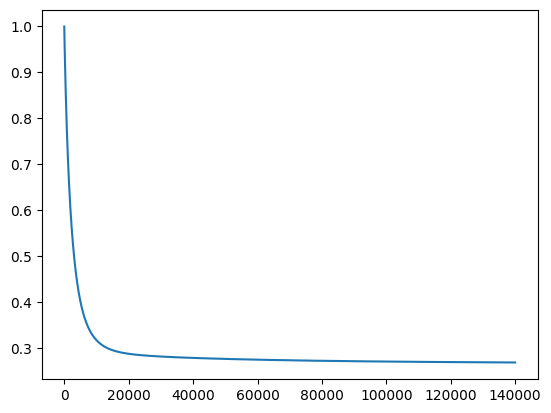

In [386]:
# plot mse score vs iteration
mse_array
plt.plot([x for x in range(iterations)], mse_array)